In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

## Obtain Data including financial ratios

In [3]:
data = pd.read_csv(Path("data_ratios.csv"))

In [4]:
data.rename(columns={'Unnamed: 0':'delete'}, inplace=True)
data.drop(columns={"delete"},inplace=True)

## Understand and Analyze Data

In [5]:
data

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,...,1.382369,344.263,0.464594,0.243519,339.515,1.013985,2.182519,-1.004154,0.047454,0.103568
1,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,...,1.245637,305.379,0.435103,0.256445,340.212,0.897614,2.062990,-0.925326,0.026403,0.054469
2,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,...,0.899355,368.163,0.518394,0.306532,310.235,1.186723,2.289229,-0.703000,-0.082989,-0.189982
3,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,...,0.883074,368.233,0.536297,0.239809,294.988,1.248298,2.327623,-0.678689,-0.018074,-0.042070
4,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,...,0.919167,379.927,0.535643,0.350583,301.684,1.259354,2.351109,-0.670825,0.004940,0.011615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78396,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,...,0.094826,212.863,0.193670,0.168015,873.214,0.243770,1.258685,0.002072,0.022983,0.028929
78397,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,...,0.156037,858.231,0.459949,0.412719,985.599,0.870771,1.893190,0.076610,0.069503,0.131583
78398,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,...,0.097271,769.750,0.440806,0.391691,976.002,0.788677,1.789172,0.005713,-0.000826,-0.001477
78399,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,...,0.093245,776.045,0.447002,0.399764,959.413,0.808875,1.809554,0.001523,-0.011751,-0.021264


In [6]:
data.shape

(78401, 37)

In [7]:
data = pd.DataFrame(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78401 entries, 0 to 78400
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   current_assets                      78401 non-null  float64
 1   cost_of_goods_sold                  78401 non-null  float64
 2   depreciation_and_amortization       78401 non-null  float64
 3   EBITDA                              78401 non-null  float64
 4   inventory                           78401 non-null  float64
 5   net_income                          78401 non-null  float64
 6   total_receivables                   78401 non-null  float64
 7   market_value                        78401 non-null  float64
 8   net_sales                           78401 non-null  float64
 9   total_assets                        78401 non-null  float64
 10  total_long_term_debt                78401 non-null  float64
 11  EBIT                                78401

In [9]:
data.describe()

,current_assets,cost_of_goods_sold,depreciation_and_amortization,EBITDA,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_asset_turnover,total_debt,total_debt_to_asset,long_term_debt_to_assets,total_shareholders_equity,total_debt_to_equity_ratio,equity_multiplier,basic_earning_power,return_on_assets,return_on_equity
count,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,7.840100e+04,78401.000000,78401.000000,...,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000,78401.000000
mean,883.282228,1600.208119,121.657898,378.056101,202.322341,129.856537,287.810806,3.424908e+03,2372.213643,2876.590984,...,1.178458,1336.955808,1.636917,0.220034,1097.136539,2.773174,4.154664,-1.339494,-0.661278,-0.600429
std,3935.171474,8945.964231,653.504153,2015.384712,1062.596420,1267.668833,1338.255511,1.844409e+04,11970.551868,12939.814178,...,3.235762,5743.246027,40.445309,1.187877,5526.266728,316.551325,338.581398,16.577751,13.434044,144.863812
min,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1.977000,0.001000,...,-11.538462,0.001000,0.000041,-0.034901,-25560.000000,-5137.000000,-5846.000000,-2456.000000,-1515.000000,-31837.000000
25%,19.223000,17.447000,1.215000,-0.799000,0.006000,-7.421000,3.352000,3.525100e+01,28.035000,37.936000,...,0.480391,11.885000,0.248268,0.000000,13.806000,0.225890,1.272529,-1.075497,-0.138748,-0.143961
50%,101.370000,105.233000,8.027000,15.252000,7.154000,1.649000,23.071000,2.288150e+02,188.769000,215.367000,...,0.891089,68.891000,0.418435,0.102584,97.440000,0.634080,1.753401,-0.548868,0.017560,0.065524
75%,433.554000,639.214000,48.352000,140.452000,75.327000,40.446000,132.544000,1.251819e+03,1052.867000,1177.514000,...,1.459676,520.613000,0.609379,0.290148,479.605000,1.382474,2.662858,-0.223265,0.066489,0.165743
max,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,...,420.000000,230670.000000,6324.000000,188.222222,198528.000000,83585.250000,87702.500000,7.704981,244.833333,7770.333333


## Split data and prepare for training

In [10]:
# Import module
from sklearn.model_selection import train_test_split

# Split training and testing sets
# Create X, or features DataFrame
X = data[['current_ratio', 'total_debt_to_equity_ratio']]

# Create y, or target DataFrame
y = data['status']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


### Train the model on 1 stump tree

In [11]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer with 1 stump trees
Ada_classifier = AdaBoostClassifier(n_estimators=1)

In [12]:
# Train Adaboost Classifer
AdaBoost = Ada_classifier.fit(X_train, y_train)

In [13]:
#Predict the response for test dataset
AdaBoost_pred = AdaBoost.predict(X_test)

In [14]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy of the model is:  ", accuracy_score(y_test, AdaBoost_pred))

The accuracy of the model is:   0.9319422478444978


### Train the model on 20 stump trees

In [15]:
# Create adaboost classifer with 20 stump trees
Ada_classifier20 = AdaBoostClassifier(n_estimators=20)

# Train Adaboost Classifer
AdaBoost20 = Ada_classifier.fit(X_train, y_train)

#Predict the response for test dataset
AdaBoost_pred20 = AdaBoost.predict(X_test)

In [16]:
# Model accuracy 20 trees
# printing
print("The accuracy of the model with 20 Stump Trees is:  ", accuracy_score(y_test, AdaBoost_pred20))

The accuracy of the model with 20 Stump Trees is:   0.9319422478444978


In [17]:
# importing required module
from sklearn.model_selection import GridSearchCV

# initializing the model
model=AdaBoostClassifier()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})

# training the model
grid.fit(X_train,y_train)

best_estimator = grid.best_estimator_

# printing the best estimator
print("The best estimator returned by GridSearch CV is:", grid.best_estimator_)

The best estimator returned by GridSearch CV is: AdaBoostClassifier(n_estimators=1)


### Train Model on X number of stump trees

In [18]:
# Create adaboost classifer with 5 stump trees
Ada_classifier_best = AdaBoostClassifier(n_estimators = best_estimator)

# Train Adaboost Classifer
AdaBoost_best = Ada_classifier.fit(X_train, y_train)

#Predict the response for test dataset
AdaBoost_pred_best = AdaBoost_best.predict(X_test)

# printing
print("The accuracy of the model is:  ", accuracy_score(y_test, AdaBoost_pred_best))

The accuracy of the model is:   0.9319422478444978


## ADABOOST Regression

In [19]:
# importing module
from sklearn.ensemble import AdaBoostRegressor

# Create adaboost regressor with default parameters
Ada_regressor = AdaBoostRegressor()

# Train Adaboost Classifer
AdaBoost_R = Ada_regressor.fit(X_train, y_train)

In [20]:
# Grade the prediction
AdaBoostR_pred = AdaBoost_R.predict(X_test)
AdaBoostR_pred 

array([0.09630497, 0.04790231, 0.04790231, ..., 0.04790231, 0.04790231,
       0.04790231])

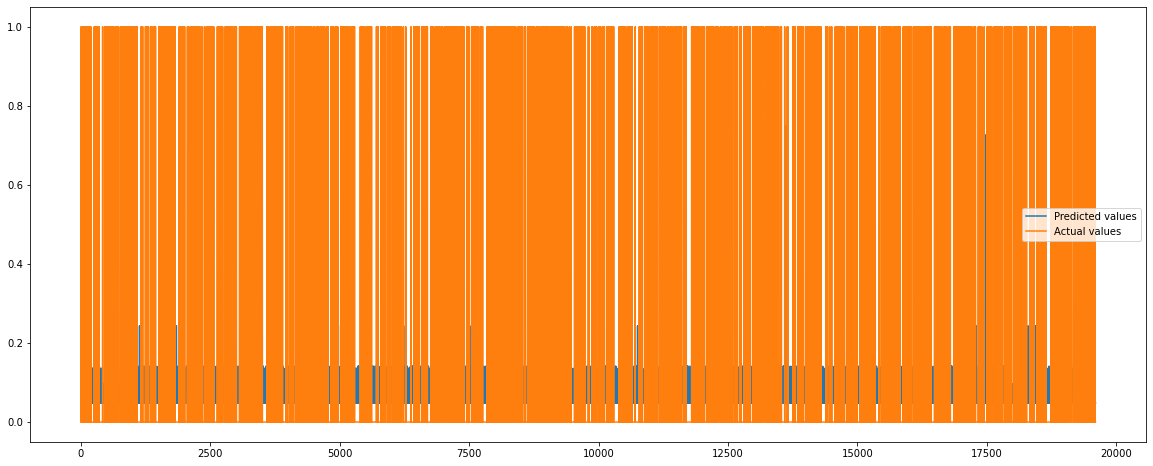

In [21]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],AdaBoostR_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="Actual values")
plt.legend()
plt.show()

In [22]:
# Importing r2 
from sklearn.metrics import r2_score
r_square_1 = r2_score(y_test, AdaBoostR_pred)
# Evaluating the model
print('R-square score is :', r_square_1)

R-square score is : 0.00608085532254643


### Find the optimum mumber of stump trees

In [23]:
# importing required module
from sklearn.model_selection import GridSearchCV

# initializing the model
model=AdaBoostRegressor()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})

# training the model
grid.fit(X_train,y_train)

best_estimator_reg = grid.best_estimator_
# printing the best estimator
print("The best estimator returned by GridSearch CV is:", grid.best_estimator_)

The best estimator returned by GridSearch CV is: AdaBoostRegressor(n_estimators=25)


## Train model with optimum number of stump trees

In [24]:
# Create adaboost regressor with default parameters
Ada_regressor_reg = AdaBoostRegressor(n_estimators=best_estimator_reg)

# Train Adaboost Classifer
AdaBoost_reg = Ada_regressor.fit(X_train, y_train)

#Predict 
AdaBoost_reg_pred = AdaBoost_reg.predict(X_test)

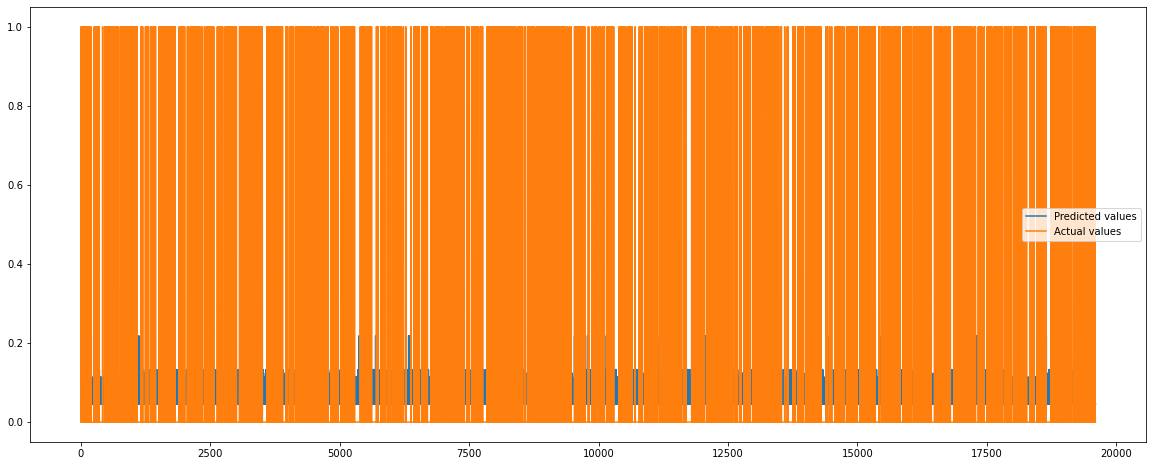

In [25]:
# Visualize the tested model
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],AdaBoost_reg_pred, label="Predicted values")
plt.plot([i for i in range(len(y_test))],y_test, label="Actual values")
plt.legend()
plt.show()

## R-Square - ADA Boost Predicted - after optimized n stumps)

In [27]:
# Importing r2 
from sklearn.metrics import r2_score

r_square_2 = r2_score(y_test, AdaBoost_reg_pred)
# Evaluating the model
print('R-square score is :', r2_score(y_test, AdaBoost_reg_pred))

R-square score is : 0.010345923567880222


In [29]:
# Import the module
from imblearn.metrics import classification_report_imbalanced

AdaBoost_reg_pred = np.where(AdaBoost_reg_pred < 0.5, 0, 1)
#print  the classification report
classification_report_reg_opt = classification_report_imbalanced(y_test,AdaBoost_reg_pred)
print(classification_report_reg_opt)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      1.00      0.00      0.96      0.00      0.00     18267
          1       0.00      0.00      1.00      0.00      0.00      0.00      1334

avg / total       0.87      0.93      0.07      0.90      0.00      0.00     19601



### R-square - ADA Boost Regression predicted - not optimized

In [30]:
print('R-square score is :', r_square_1)

R-square score is : 0.00608085532254643


In [32]:
# Import the module
from imblearn.metrics import classification_report_imbalanced
AdaBoostR_pred = np.where(AdaBoostR_pred  < 0.5, 0, 1)
# Print the classification report
classification_report_reg = classification_report_imbalanced(y_test,AdaBoostR_pred)
print(classification_report_reg)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      1.00      0.00      0.96      0.00      0.00     18267
          1       0.00      0.00      1.00      0.00      0.00      0.00      1334

avg / total       0.87      0.93      0.07      0.90      0.00      0.00     19601



# Interpretation
If the squared error is very small then we can say that the line is a good fit. 

# Mathematical explanation
So if SEline is a small number then the whole fraction will be a very small value. And this will result in a larger number when subtracted from one. Thus if the squared error is small then R squared or the coefficient of determination will get larger, nearly equal to one. This shows that the line is a good fit.
Similarly in the opposite case if the squared error of line is huge that means a lot of error between data points and the line, then SEline this number will get large and hence resulting in a larger value of the fraction. So the R squared or the coefficient of determination will be a smaller value, showing a poorly fit regression line.